In [1]:
"""Count: llama65b joint accuracy."""
import os
import copy
import itertools
import numpy as np

size = 65
# result_folder = "results_65/prompt_ToMh"
# result_folder = 'API_responses'
result_folder = 'result_llama65b-v1'
ans_folder = "data_ToMh_old"
acc = {}

def correct(result, choice, ans):
    if ans in result.lower() or choice in result:
        return 1
    return 0

# Iterate over all files and subdirectories within the root folder
for folder_name, subfolders, filenames in os.walk(result_folder):
    for filename in filenames:
        if filename.endswith(".txt"):
                ans_folder_name = folder_name.replace(result_folder, ans_folder)
                
                with open(os.path.join(ans_folder_name, filename), "r") as f:
                    output = f.read()
                    ans = output[output.find('Answer: '):]
                    ans = ans[:ans.find('\n')]
                    ans = ans.split()[-1]
                    choice = output[output.find('Choices:'):]
                    choice = choice[choice.find(ans)-3]
                    ans = ans.replace('_',' ')

                with open(os.path.join(folder_name, filename), "r") as f:
                    result = f.read()
                    result = result[-60:]
                    result = result.replace('_',' ')
                    choice_exist = result.find(choice)
                    acc_path  = os.path.join(folder_name, filename).replace(result_folder,'')
                    
                acc[acc_path] = correct(result, choice, ans)

print(acc_path)

# joint acc
joint_acc = copy.deepcopy(acc)
for key, value in acc.items():
    if value == 0:
        index = 2+key.find('r_')
        o = int(key[index]) + 1
        for i in range(o, 5):
            # print('r_'+key[index])
            new_k = key.replace('r_'+key[index], 'r_'+str(i))
            # print(key, new_k)
            joint_acc[new_k] = 0

tells = ['No_Tell', 'Tell']
prompts = ['CoT', 'MC']
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]

accuracy_data_3 = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}
joint_accuracy_data_3 = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}

for tell, prompt, length, order in itertools.product(tells, prompts, lengths, orders):
    acc_value = 0
    joint_acc_value = 0
    for sample_num in range(1, 21):
        acc_path = f'/{tell}/{prompt}/length_{length}/sample_{sample_num}/order_{order}.txt'
        path = result_folder + acc_path
        if os.path.exists(path):
            acc_value += acc[acc_path]
            joint_acc_value += joint_acc[acc_path]

    accuracy_data_3[tell][prompt][length-1][order] = acc_value / 20
    joint_accuracy_data_3[tell][prompt][length-1][order] = joint_acc_value / 20

/Tell/MC/length_1/sample_15/order_1.txt


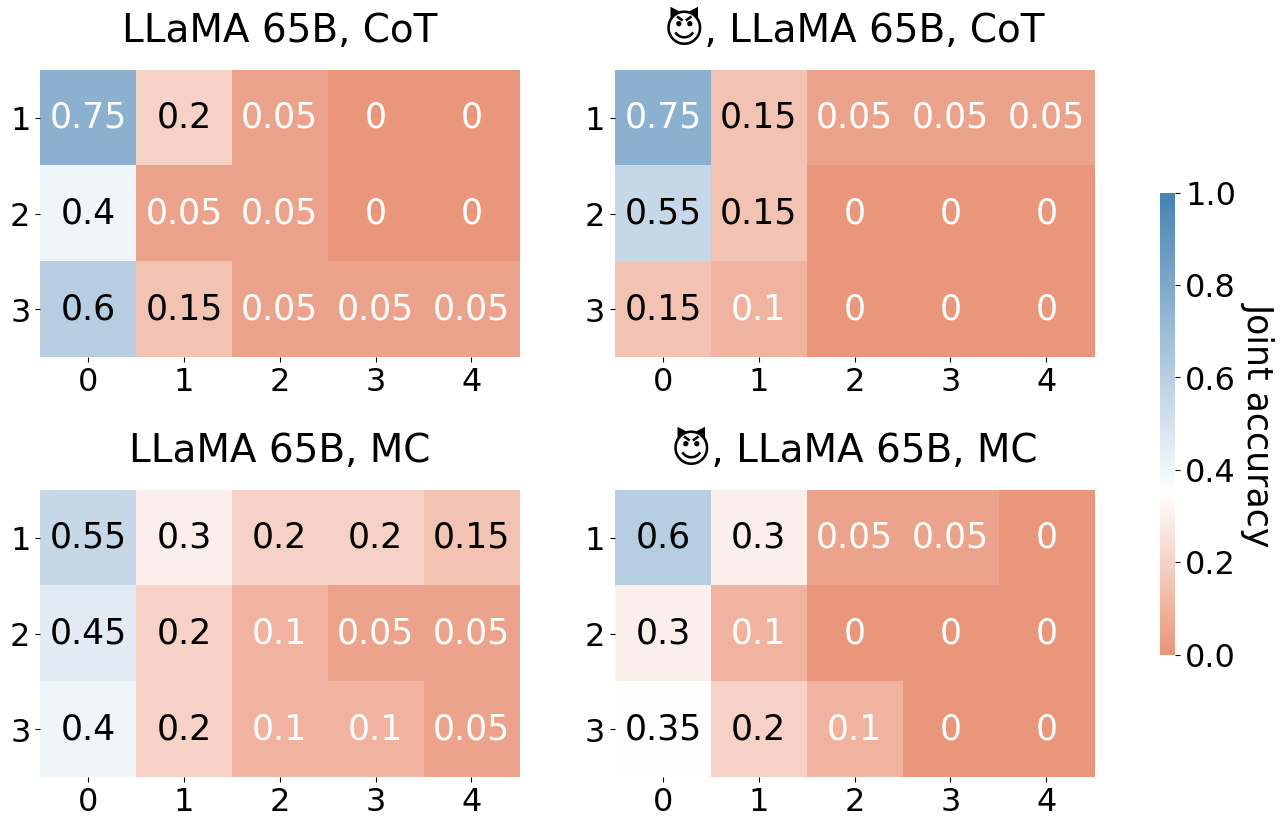

In [11]:
"""Plot: llama65b joint accuracy heatmap"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pprint

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, '#c23728'), (0.05, '#e14b31'), (0.1, '#de6e56'), (0.2, '#e1a692'), (0.3, '#e2e2e2'), (0.6, '#a7d5ed'), (0.7, '#63bff0'), (0.8, '#22a7f0'), (1, '#1984c5')]
# colors = [(0, '#a2191f'), (0.13333333333333333, '#da1e28'), (0.2, '#fa4d56'), (0.26666666666666666, '#ff8389'), (0.3333333333333333, '#ffb3b8'), (0.4, '#ffd7d9'), (0.4666666666666667, '#fff1f1'), (0.5333333333333333, '#e5f6ff'), (0.6, '#bae6ff'), (0.6666666666666666, '#82cfff'), (0.7333333333333333, '#33b1ff'), (0.8, '#1192e8'), (0.8666666666666667, '#0072c3'), (0.9333333333333333, '#00539a'), (1.0, '#003a6d')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
# colors = [(0, 'indianred'), (0.1, 'indianred'), (0.2, 'lightcoral'), (0.3, 'mistyrose'), (0.4, 'white'), (1, 'steelblue')]
# colors = [(0, 'lightcoral'), (0.1, 'lightcoral'), (0.25, 'mistyrose'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

# for tell, prompt in itertools.product(tells, prompts):
#     fig, ax = plt.subplots(figsize=(8, 5))
#     im = ax.imshow(accuracy_data_3[tell][prompt], cmap=mpl.colormaps['Blues'])
#     # im = ax.imshow(accuracy_data_3[tell][prompt], cmap=cmap) # customize colormap

#     # Show all ticks and label them with the respective list entries
#     ax.set_xticks(np.arange(5), rotation=45)
#     ax.set_yticks(np.arange(3), labels=[1, 2, 3])
#     ax.set_xlabel('ToM order')
#     ax.set_ylabel('Story length')
#     cbar = ax.figure.colorbar(im, ax=ax)
#     cbar.ax.set_ylabel("Accuracy", rotation=-90, va="bottom")
#     communication = 'w/ deception' if tell == 'Tell' else 'w/o deception'
#     ax.set_title(f'{communication}, {prompt} prompting', fontsize=TITLE_FONT_SIZE)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(),
#             rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(3):
#         for j in range(5):
#             rounded = np.round(accuracy_data_3[tell][prompt], 2)
#             fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.7 else 'white'
#             text = ax.text(j, i, rounded[i][j],
#                         ha="center", va="center", color=fontcolor)

#     fig.tight_layout()
#     plt.savefig(f'data_figs/{tell}_{prompt}.pdf')

"""Plot 2 combined heatmaps"""
# Show all ticks and label them with the respective list entries
cmap = blueredcmap
fig, axs = plt.subplots(2, 2, figsize=(17,10))
titles = np.array([['LLaMA 65B, CoT', '😈, LLaMA 65B, CoT'], ['LLaMA 65B, MC', '😈, LLaMA 65B, MC']])

im1 = axs[0][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[1][1].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
for i, j in itertools.product(range(2), range(2)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    # axs[1][j].set_xlabel('ToM order')
    # axs[i][0].set_ylabel('Story length')
    communication = 'llama65b, w/ deception, ' if j == 1 else 'llama65b, w/o deception, '
    axs[i][j].set_title(titles[i][j], fontsize=TITLE_FONT_SIZE, pad=20)
    for edge, spine in axs[i][j].spines.items():
            spine.set_visible(False)

# Loop over data dimensions and create text annotations.
for t, tell in enumerate(tells):
    for p, prompt in enumerate(prompts):
        rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
        for i in range(3):
            for j in range(5):
                fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.75 and joint_accuracy_data_3[tell][prompt][i][j] > 0.1 else 'white'
                value = rounded[i][j] if rounded[i][j] != 0 else 0
                text = axs[p][t].text(j, i, value,
                            ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.6, aspect=30)
cbar.ax.set_ylabel('Joint accuracy', rotation=-90, va="bottom")
cbar.outline.set_edgecolor('none')

plt.savefig(f'data_figs/CoT_heatmaps_LLaMA.pdf')

In [ ]:
"""Joint accuracy vs. deception times"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
FONT_SIZE = 25
TICK_SIZE = 21
LEGEND_FONT_SIZE = 22

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"

markers = ['.', 's', '^', 'D', 'o']
joint_acc_vs_deception = np.zeros((5, 7))
order_label = ['0th', '1st', '2nd', '3rd', '4th']

colors = ['darksalmon', '#7C84B9', 'orange', 'lightcoral', 'steelblue']
plt.figure(figsize=(9, 5.5)) 
for i, acc in enumerate(joint_acc_vs_deception_3):
    if i in [0]:
        continue
    zorder = 2
    plt.plot([0,1,2,3,4], acc, linewidth=2.6, marker=markers[i], markersize=9, label=order_label[i], color=colors[i], zorder=zorder)

# 添加标题和轴标签
# plt.title('Multiple Line Plot')
ax = plt.gca()
plt.xlabel('Deception times per story', labelpad=10)
plt.ylabel('Accuracy')
# plt.ylim(0, 0.8)
# plt.xticks([0,2,4])
# plt.yticks([0,0.1])
plt.grid(axis='y', linestyle='dashed', which='both')
# plt.box(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('silver')
plt.tick_params(axis='x', which='both', bottom=False, pad=0)
plt.tick_params(left=False)
# plt.yscale('log')

plt.legend(loc='upper center', bbox_to_anchor=(0.45, 1.17), ncol=4, frameon=False)
plt.subplots_adjust(bottom=0.15, top=0.87, right=0.98)

plt.savefig('data_figs/jointacc_vs_deception_3.pdf')
plt.show()